In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('D:\Midtermtest\winequality-red.csv', delimiter=';')

# Clean column names
df.columns = df.columns.str.strip()

#Data process
y_binary = (df['quality'] >= 6).astype(int)  # Chất lượng >= 6 là 1, dưới 6 là 0
X = df.drop('quality', axis=1)  # Features

#  tập train và tập evaluation
X_train, X_eval, y_train_class, y_eval_class = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_train_reg, X_eval_reg, y_train_reg, y_eval_reg = train_test_split(X, df['quality'], test_size=0.2, random_state=42)

# Kiểm tra kích thước các tập dữ liệu
print(f'Train set size: {X_train.shape[0]}')
print(f'Evaluation set size: {X_eval.shape[0]}')

Train set size: 1279
Evaluation set size: 320


Accuracy: 0.740625
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



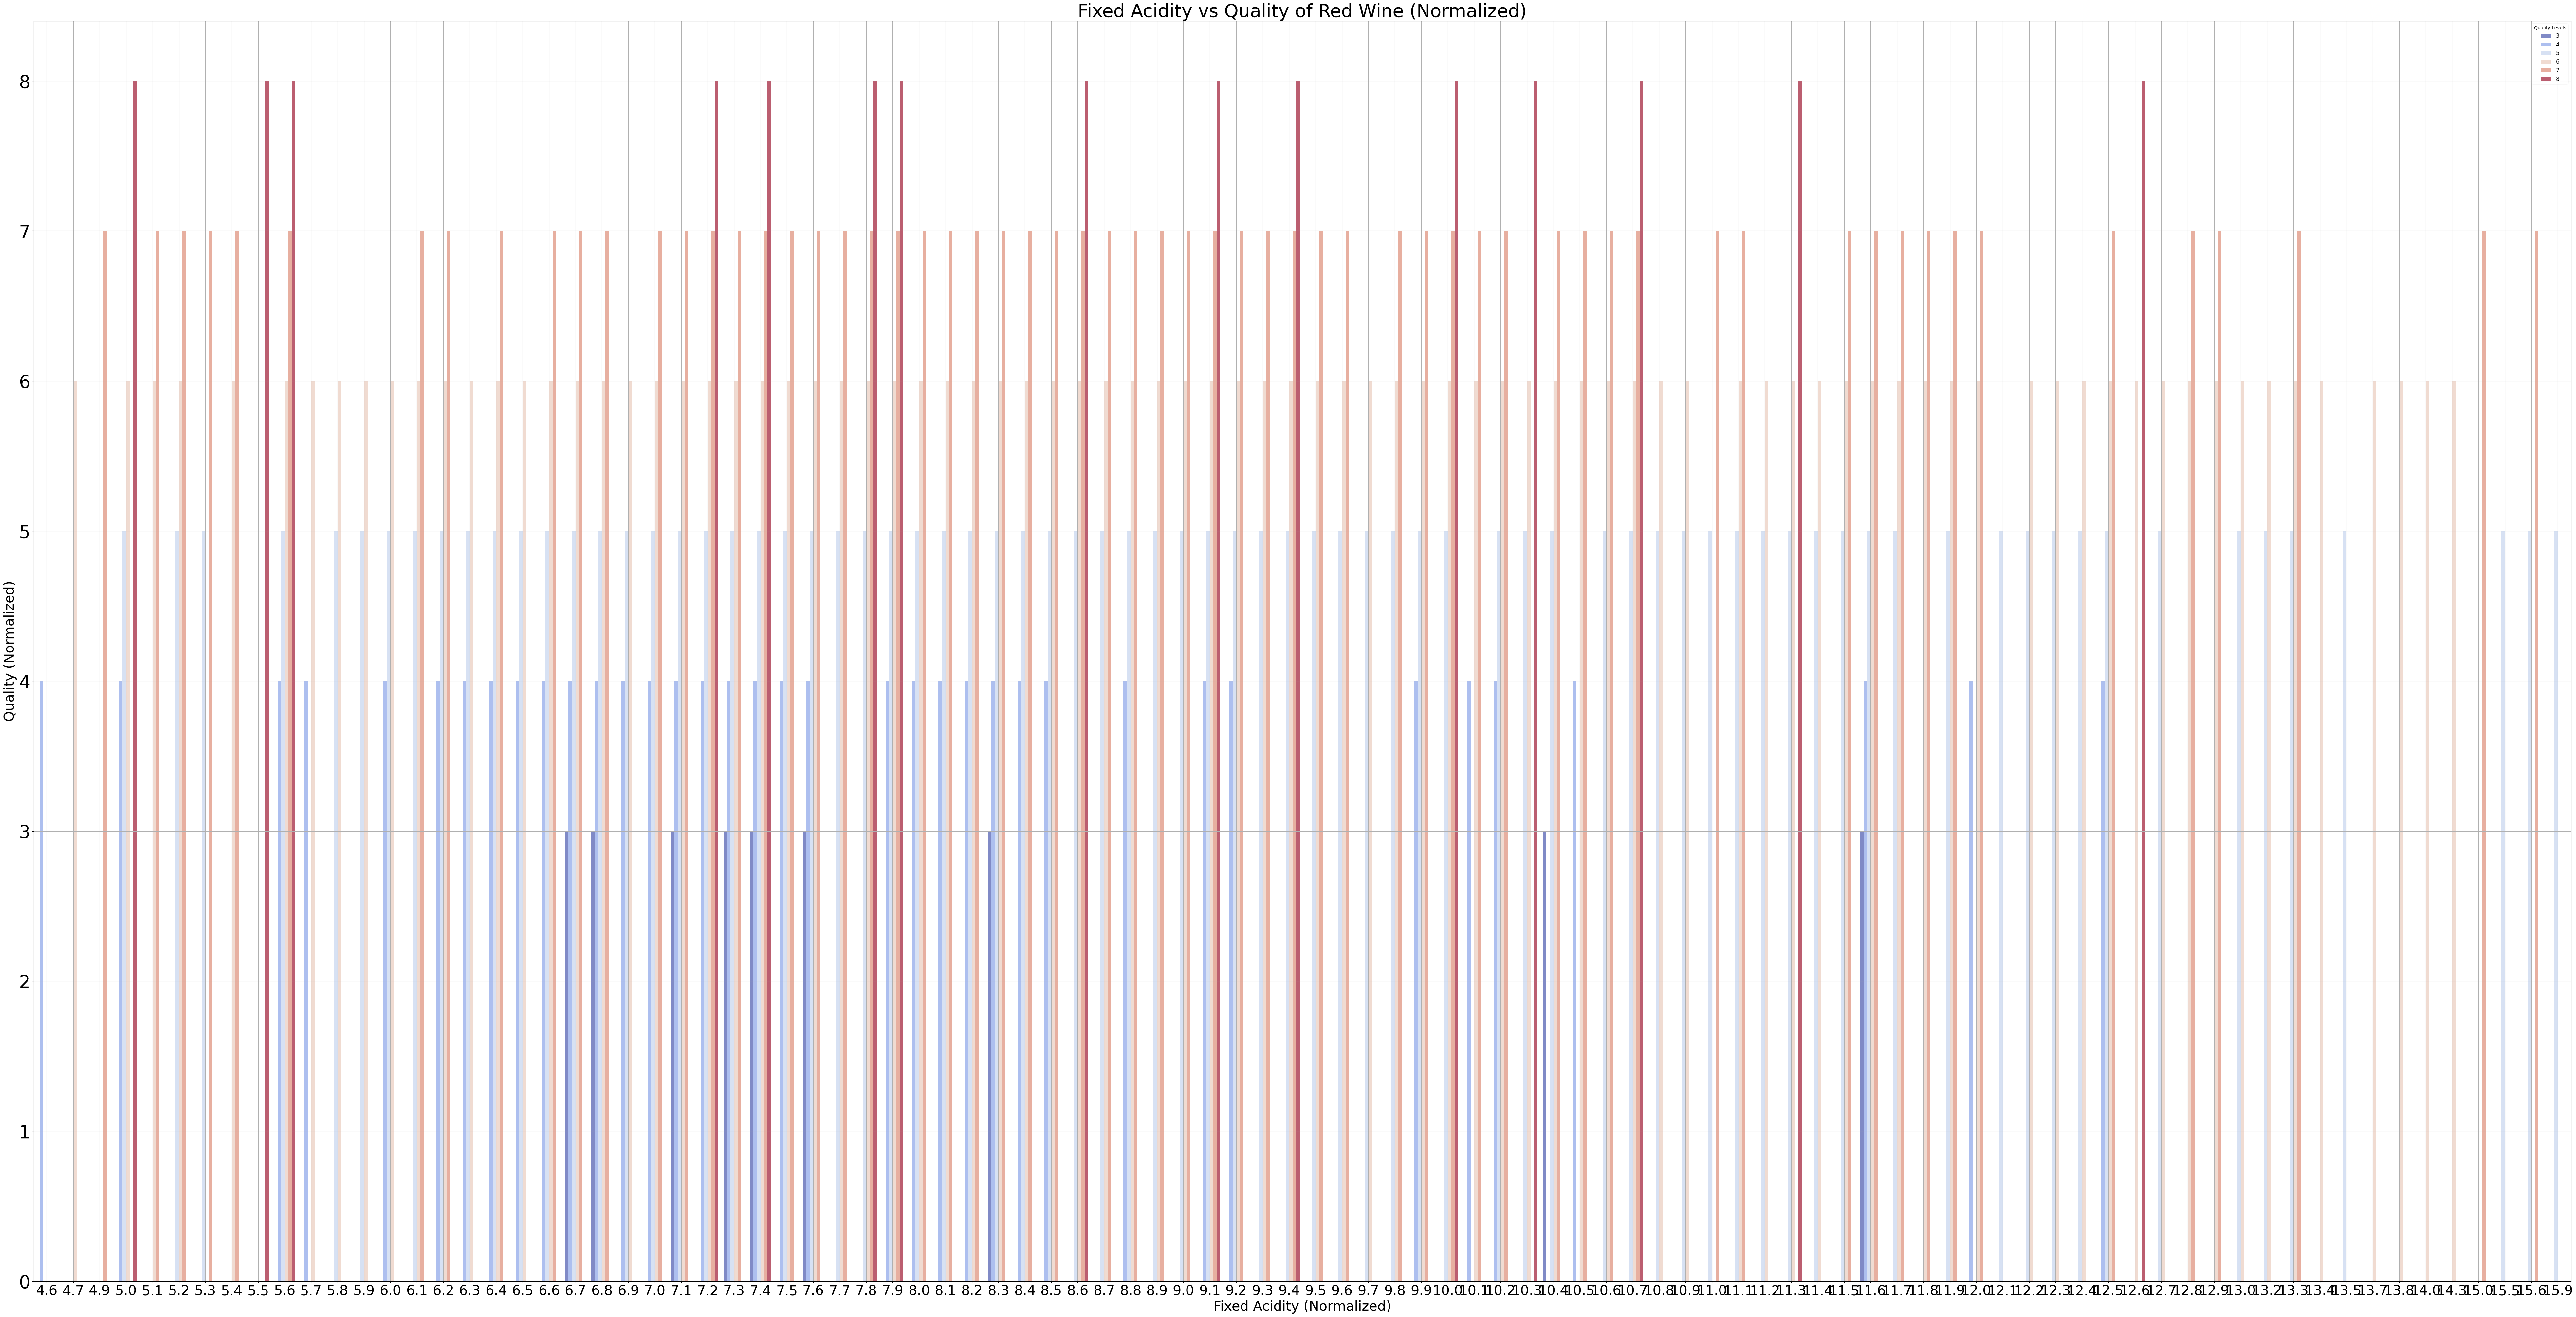

In [20]:
#CLASSIFICATION 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Chuyển đổi nhãn thành hai lớp (0 và 1)
y_binary = (df['quality'] >= 6).astype(int)  # Chất lượng >= 6 là 1, dưới 6 là 0


# Phân chia dữ liệu
X_train, X_eval, y_train, y_eval = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Khởi tạo mô hình phân loại
classifier = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình
classifier.fit(X_train, y_train_class)

# Dự đoán trên tập đánh giá
y_pred_class = classifier.predict(X_eval)

# Đánh giá mô hình
accuracy = accuracy_score(y_eval, y_pred_class)
report = classification_report(y_eval, y_pred_class)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

plt.figure(figsize=(100, 50))

# Tạo biểu đồ phân tán với dữ liệu đã chuẩn hóa
sns.barplot(data=df, x='fixed acidity', y='quality', hue='quality', palette='coolwarm', alpha=0.7)

# Cải thiện tiêu đề và nhãn
plt.title('Fixed Acidity vs Quality of Red Wine (Normalized)', fontsize=40)
plt.xlabel('Fixed Acidity (Normalized)', fontsize=30)
plt.ylabel('Quality (Normalized)', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize = 40)

# Thêm đường lưới để dễ đọc
plt.grid(True)

# Hiển thị biểu đồ
plt.legend(title='Quality Levels', fontsize=12)
plt.show()

Mean Absolute Error (MAE): 0.3614936716769028
Mean Squared Error (MSE): 0.1762567472581914
R-squared: 0.2848888260533776


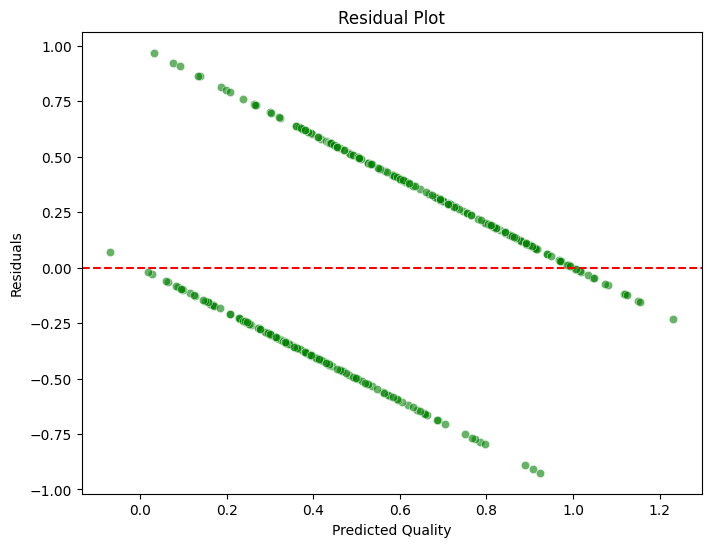

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#install linear
model = LinearRegression()

#train model
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_eval)


# Evaluate the model using different metrics
mae = mean_absolute_error(y_eval, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_eval, y_pred)   # Mean Squared Error
r2 = r2_score(y_eval, y_pred)               # R-squared

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

residuals = y_eval - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line
plt.title('Residual Plot')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.show()

Logistic Regression (Classification):
Accuracy: 0.740625
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320


Linear Regression (Regression):
Mean Absolute Error (MAE): 0.5035304415524378
Mean Squared Error (MSE): 0.390025143963954
R-squared: 0.4031803412796233


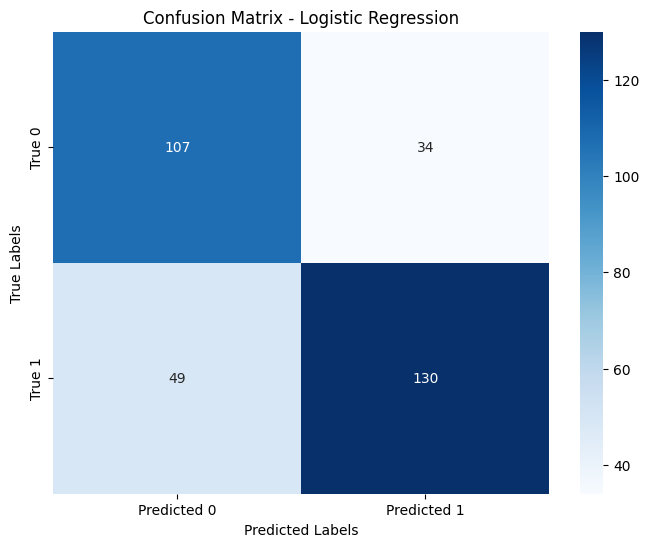

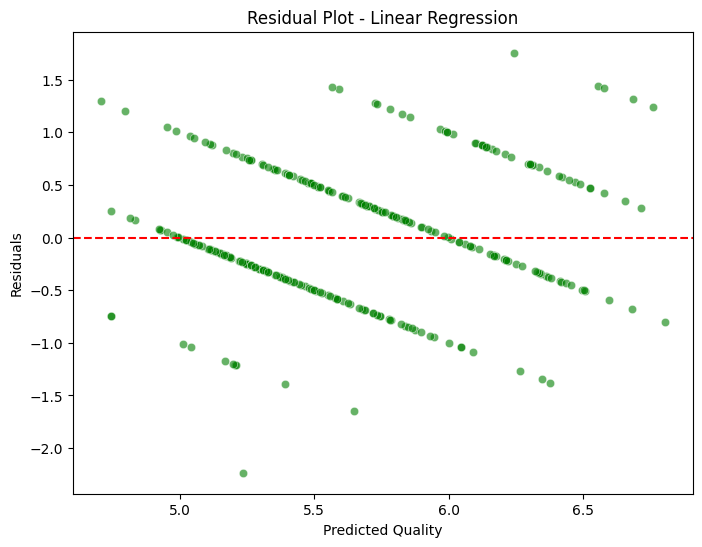

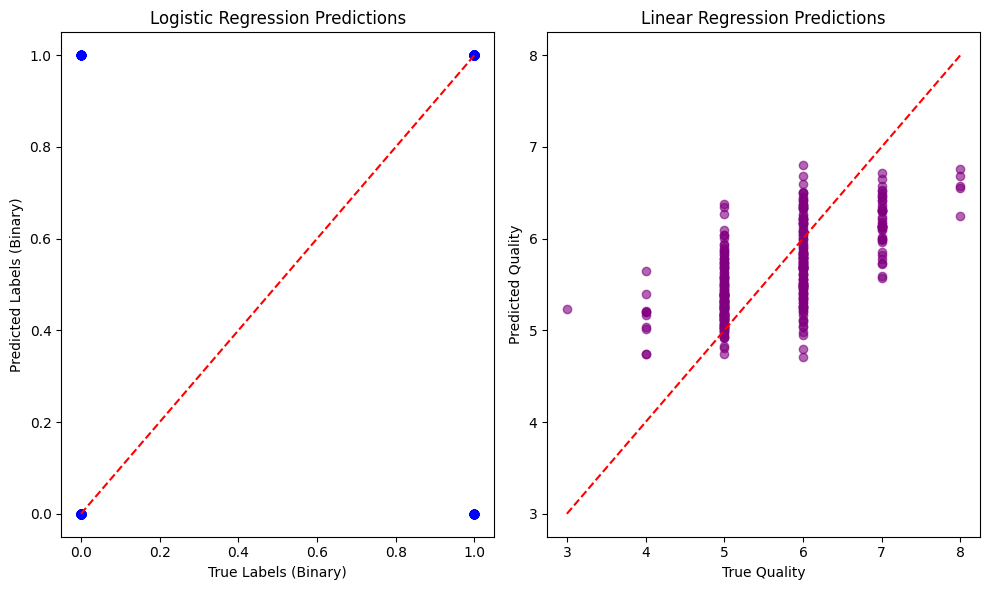

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv('D:\Midtermtest\winequality-red.csv', delimiter=';')
df.columns = df.columns.str.strip()

# Convert target for classification (binary)
y_binary = (df['quality'] >= 6).astype(int)  # Chất lượng >= 6 là 1, dưới 6 là 0
X = df.drop('quality', axis=1)  # Features

# Split data into training and evaluation sets
X_train, X_eval, y_train_class, y_eval_class = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_train_reg, X_eval_reg, y_train_reg, y_eval_reg = train_test_split(X, df['quality'], test_size=0.2, random_state=42)

# Initialize both models
log_reg = LogisticRegression(max_iter=1000)
lin_reg = LinearRegression()

# Train Logistic Regression for classification
log_reg.fit(X_train, y_train_class)
y_pred_class = log_reg.predict(X_eval)

# Train Linear Regression for regression
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_eval_reg)

# Evaluate Logistic Regression (Classification Metrics)
accuracy = accuracy_score(y_eval_class, y_pred_class)
class_report = classification_report(y_eval_class, y_pred_class)

# Evaluate Linear Regression (Regression Metrics)
mae = mean_absolute_error(y_eval_reg, y_pred_reg)
mse = mean_squared_error(y_eval_reg, y_pred_reg)
r2 = r2_score(y_eval_reg, y_pred_reg)

# Print results for comparison
print("Logistic Regression (Classification):")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

print("\nLinear Regression (Regression):")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# OPTIONAL: Visualize confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_eval_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# OPTIONAL: Residual Plot for Linear Regression
residuals = y_eval_reg - y_pred_reg

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_reg, y=residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line
plt.title('Residual Plot - Linear Regression')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.show()

# OPTIONAL: Comparison of Predictions for both models
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_eval_class, y_pred_class, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal line
plt.title('Logistic Regression Predictions')
plt.xlabel('True Labels (Binary)')
plt.ylabel('Predicted Labels (Binary)')

plt.subplot(1, 2, 2)
plt.scatter(y_eval_reg, y_pred_reg, color='purple', alpha=0.6)
plt.plot([min(y_eval_reg), max(y_eval_reg)], [min(y_eval_reg), max(y_eval_reg)], color='red', linestyle='--')  # Ideal line
plt.title('Linear Regression Predictions')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df1 = pd.read_csv('D:\Midtermtest\winequality-white.csv', delimiter=';')

# Clean column names
df1.columns = df1.columns.str.strip()

#Data process
y_binary = (df1['quality'] >= 6).astype(int)  # Chất lượng >= 6 là 1, dưới 6 là 0
X = df1.drop('quality', axis=1)  # Features

#  tập train và tập evaluation
X_train, X_eval, y_train_class, y_eval_class = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_train_reg, X_eval_reg, y_train_reg, y_eval_reg = train_test_split(X, df1['quality'], test_size=0.2, random_state=42)

# Kiểm tra kích thước các tập dữ liệu
print(f'Train set size: {X_train.shape[0]}')
print(f'Evaluation set size: {X_eval.shape[0]}')

Train set size: 3918
Evaluation set size: 980


c:\Users\MSI GAMING\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7428571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.49      0.55       321
           1       0.78      0.87      0.82       659

    accuracy                           0.74       980
   macro avg       0.71      0.68      0.69       980
weighted avg       0.73      0.74      0.73       980



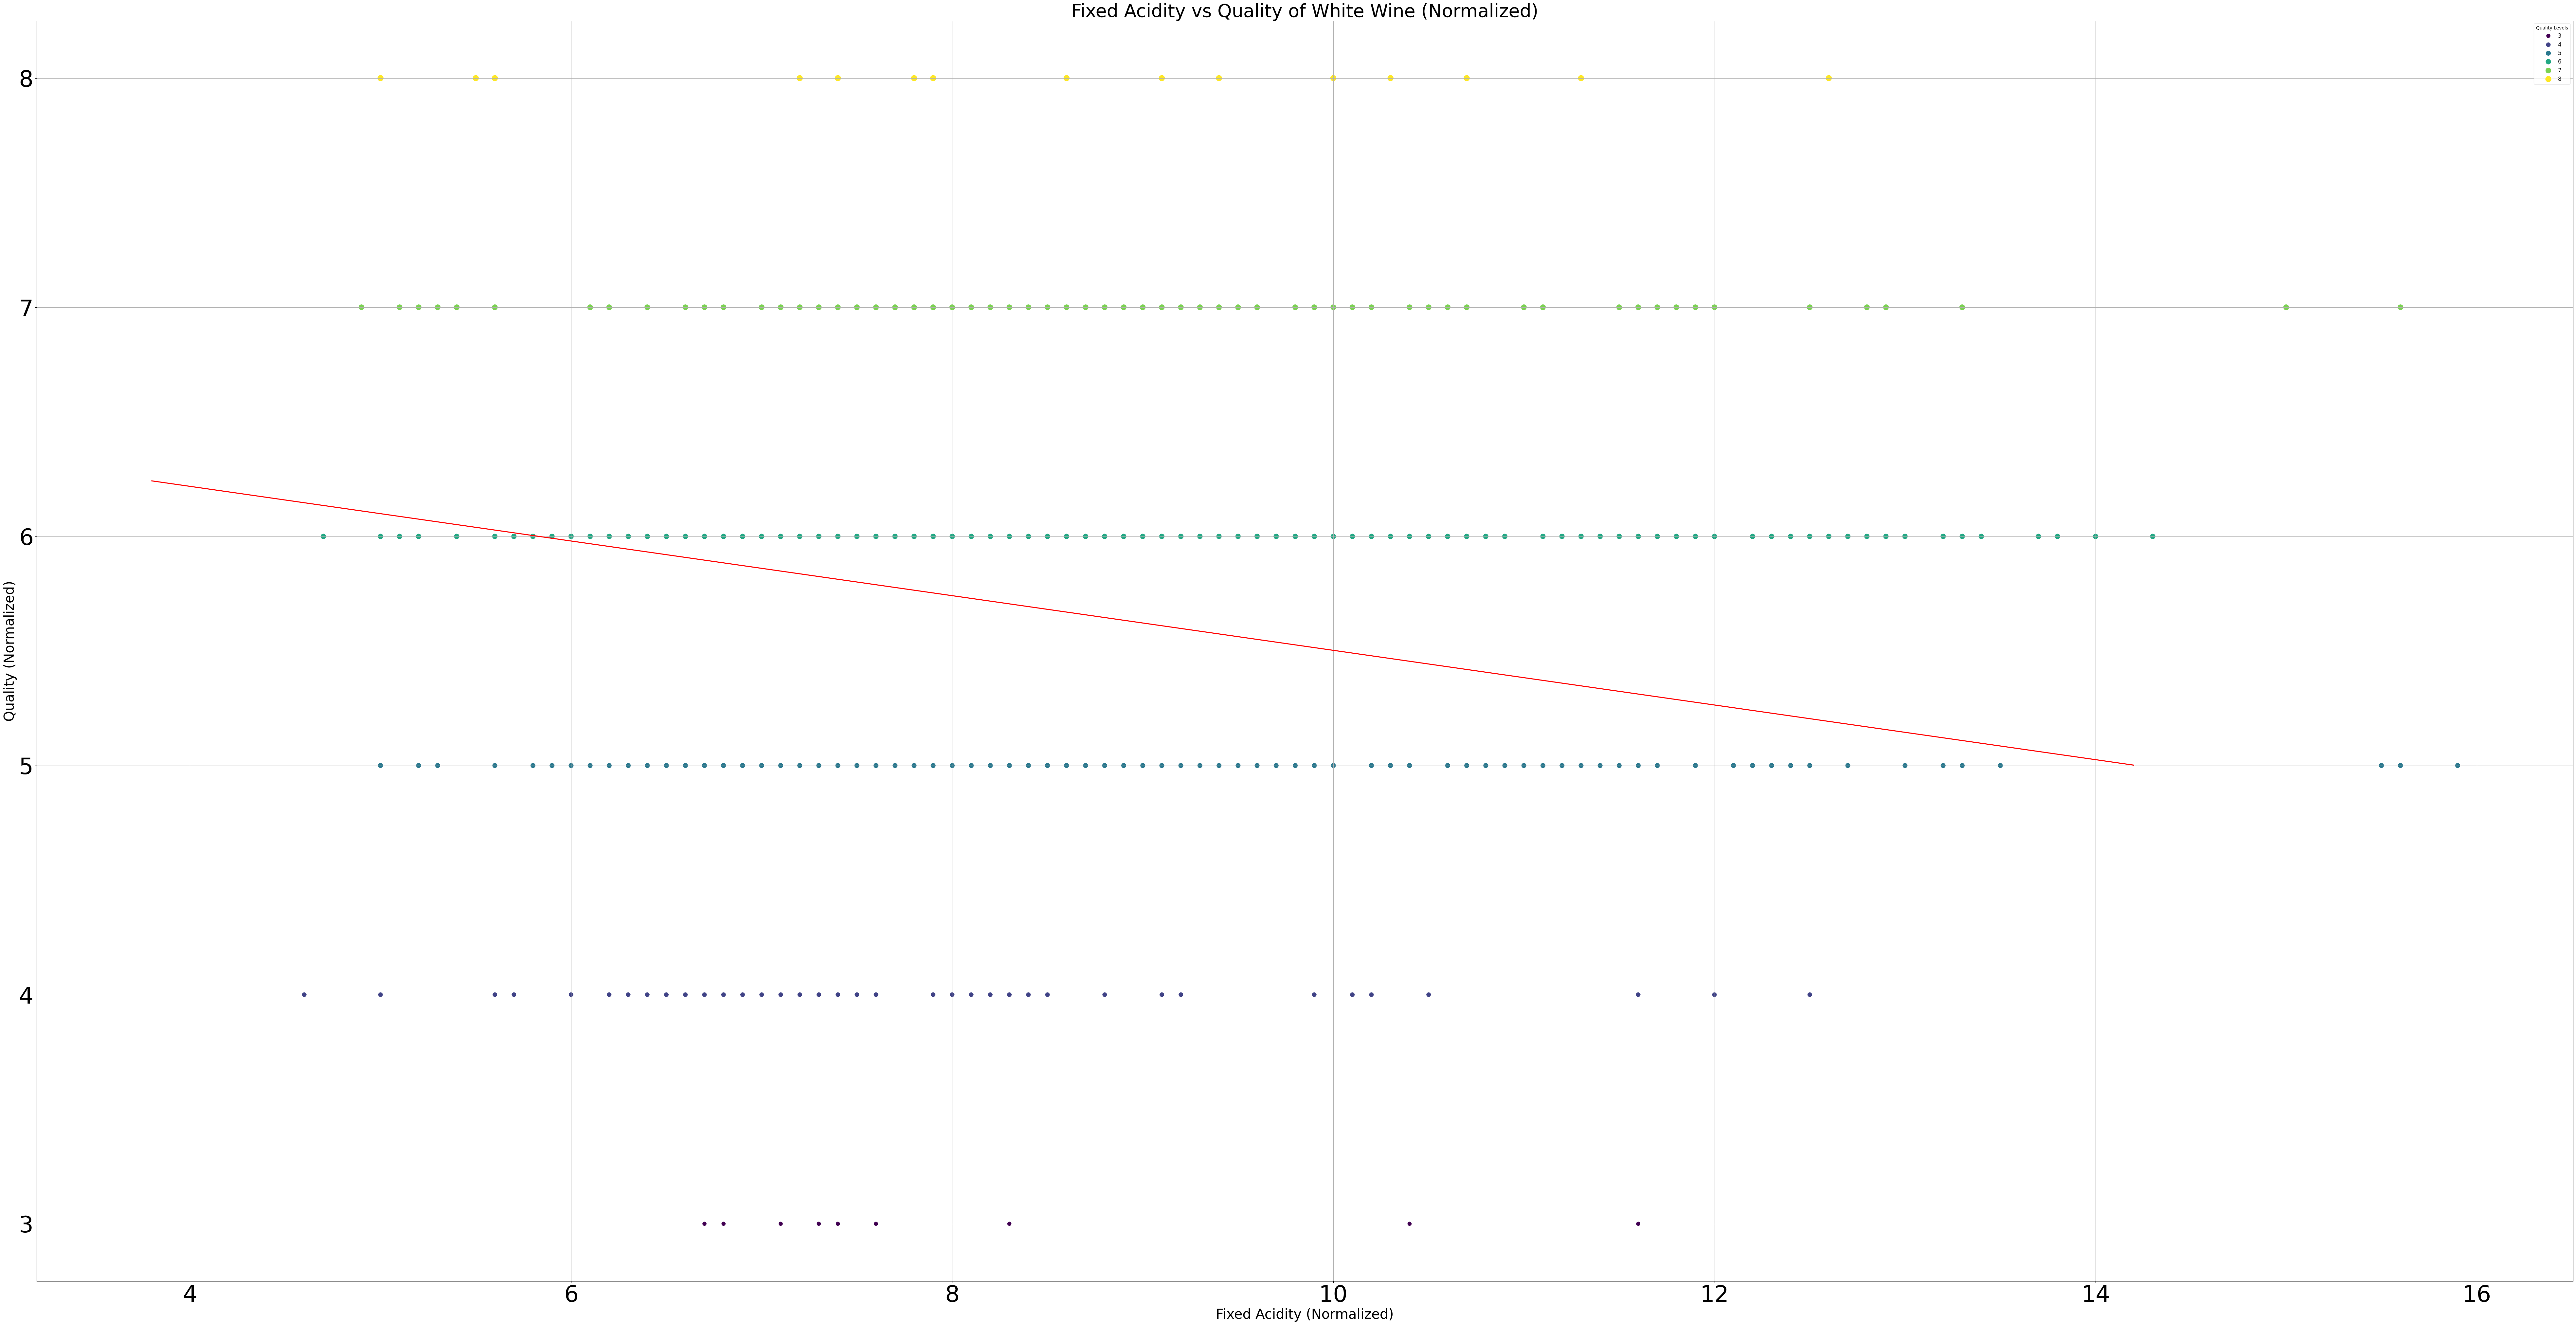

In [10]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Chuyển đổi nhãn thành hai lớp (0 và 1)
y_binary_1 = (df1['quality'] >= 6).astype(int)  # Chất lượng >= 6 là 1, dưới 6 là 0

# Phân chia dữ liệu
X_train, X_eval, y_train, y_eval = train_test_split(X, y_binary_1, test_size=0.2, random_state=42)

# Khởi tạo mô hình phân loại
classifier = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình
classifier.fit(X_train, y_train_class)

# Dự đoán trên tập đánh giá
y_pred_class = classifier.predict(X_eval)

# Đánh giá mô hình
accuracy = accuracy_score(y_eval, y_pred_class)
report = classification_report(y_eval, y_pred_class)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

plt.figure(figsize=(100, 50))

# Tạo biểu đồ phân tán với dữ liệu đã chuẩn hóa
#sns.barplot(data=df, x='fixed acidity', y='quality', hue='quality', palette='coolwarm', alpha=0.7)
sns.scatterplot(data=df, x='fixed acidity', y='quality', hue='quality', palette='viridis', size='quality', sizes=(100, 200), alpha=1)

sns.regplot(data=df1, x='fixed acidity', y='quality', scatter=False, color='red', ci=None)

# Cải thiện tiêu đề và nhãn
plt.title('Fixed Acidity vs Quality of White Wine (Normalized)', fontsize=40)
plt.xlabel('Fixed Acidity (Normalized)', fontsize=30)
plt.ylabel('Quality (Normalized)', fontsize=30)
plt.xticks(fontsize=50)
plt.yticks(fontsize = 50)

# Thêm đường lưới để dễ đọc
plt.grid(True)

# Hiển thị biểu đồ
plt.legend(title='Quality Levels', fontsize=12)
plt.show()